## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_results_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
combine_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
print(f"There are {combine_results_df['Mouse ID'].nunique()} mice")

There are 249 mice


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_df = combine_results_df[combine_results_df[["Mouse ID", "Timepoint"]].duplicated() == True]

duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = combine_results_df[combine_results_df[["Mouse ID", "Timepoint"]].duplicated(keep="last") == True]

duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_df = combine_results_df[combine_results_df["Mouse ID"] != 'g989']

In [6]:
# Checking the number of mice in the clean DataFrame.
print(f"There are {cleaned_mouse_df['Mouse ID'].nunique()} unique mice once the mouse with duplicate data is removed")

There are 248 unique mice once the mouse with duplicate data is removed


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_stats_df = cleaned_mouse_df.groupby("Drug Regimen")

mean_tv = summary_stats_df["Tumor Volume (mm3)"].mean()

median_tv = summary_stats_df["Tumor Volume (mm3)"].median()

var_tv = summary_stats_df["Tumor Volume (mm3)"].var()

std_tv = summary_stats_df["Tumor Volume (mm3)"].std()

sem_tv = summary_stats_df["Tumor Volume (mm3)"].sem()

summary_stats_df = pd.DataFrame({"Mean Tumor Volume": mean_tv,
                                "Median Tumor Volume": median_tv,
                                "Variance in Tumor Volume": var_tv,
                                "Standard Deviation of Tumor Volume": std_tv,
                                "SEM of Tumor Volume":sem_tv})

summary_stats_df["Mean Tumor Volume"] = summary_stats_df["Mean Tumor Volume"].map("{0:,.2f}mm3".format)
summary_stats_df["Median Tumor Volume"] = summary_stats_df["Median Tumor Volume"].map("{0:,.2f}mm3".format)
summary_stats_df["Variance in Tumor Volume"] = summary_stats_df["Variance in Tumor Volume"].map("{0:,.2f}mm3".format)
summary_stats_df["Standard Deviation of Tumor Volume"] = summary_stats_df["Standard Deviation of Tumor Volume"].map("{0:,.2f}mm3".format)
summary_stats_df["SEM of Tumor Volume"] = summary_stats_df["SEM of Tumor Volume"].map("{0:,.2f}mm3".format)

summary_stats_df


,Mean Tumor Volume,Median Tumor Volume,Variance in Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68mm3,41.56mm3,24.95mm3,4.99mm3,0.33mm3
Ceftamin,52.59mm3,51.78mm3,39.29mm3,6.27mm3,0.47mm3
Infubinol,52.88mm3,51.82mm3,43.13mm3,6.57mm3,0.49mm3
Ketapril,55.24mm3,53.70mm3,68.55mm3,8.28mm3,0.60mm3
Naftisol,54.33mm3,52.51mm3,66.17mm3,8.13mm3,0.60mm3
Placebo,54.03mm3,52.29mm3,61.17mm3,7.82mm3,0.58mm3
Propriva,52.32mm3,50.45mm3,43.85mm3,6.62mm3,0.54mm3
Ramicane,40.22mm3,40.67mm3,23.49mm3,4.85mm3,0.32mm3
Stelasyn,54.23mm3,52.43mm3,59.45mm3,7.71mm3,0.57mm3


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_stats_df = cleaned_mouse_df.groupby("Drug Regimen")

agg_tv = summary_stats_df.agg({"Tumor Volume (mm3)":["mean","median", "var", "std", "sem"]})
agg_tv


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

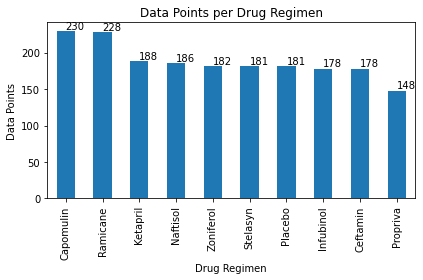

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_data = cleaned_mouse_df["Drug Regimen"].value_counts()

mouse_plot = drug_data.plot(kind="bar")

for index,value in enumerate(drug_data):
    mouse_plot.annotate(value,(index, value), xytext=(0,2),textcoords='offset points')


plt.title("Data Points per Drug Regimen")
plt.ylabel("Data Points")
plt.xlabel("Drug Regimen")

plt.tight_layout()


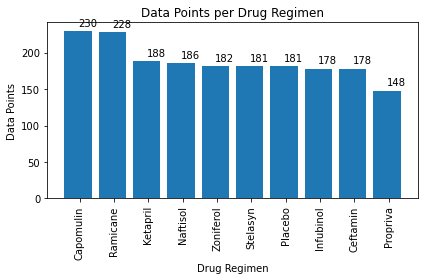

In [35]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_data = cleaned_mouse_df.sort_values("Drug Regimen")["Drug Regimen"].value_counts()
drug_names = cleaned_mouse_df.sort_values("Drug Regimen")["Drug Regimen"].unique()
index= np.arange(len(drug_data.index))
width= 0.1
fig, ax = plt.subplots()
drugs1 = ax.bar(index - width/2, drug_data)
ax.set_ylabel("Data Points")
ax.set_xlabel("Drug Regimen")
ax.set_title("Data Points per Drug Regimen")
ax.set_xticks(index)
plt.xticks(rotation=90)
ax.set_xticklabels(drug_data.index)
def autolabel(drugs, xpos='center'):
    ha = {'center': 'center', 'center': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}
    for drug in drugs:
        height = drug.get_height()
        ax.annotate('{}'.format(height),
                    xy=(drug.get_x() + drug.get_width()/2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset pixels",  # in both directions
                    ha=ha[xpos], va='bottom')
autolabel(drugs1)
fig.tight_layout()

Text(0.5, 1.0, 'Sex Distribution Chart')

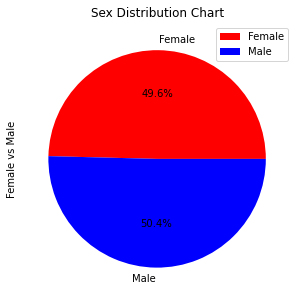

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
male_mouse = cleaned_mouse_df.loc[cleaned_mouse_df["Sex"]=="Male", "Mouse ID"].nunique()
female_mouse = cleaned_mouse_df.loc[cleaned_mouse_df["Sex"]=="Female", "Mouse ID"].nunique()

sex_dist_df = pd.DataFrame ({"Female vs Male": [female_mouse, male_mouse]},
                           index=["Female","Male"])

colors = ["red", "blue"]
plot = sex_dist_df.plot.pie(y="Female vs Male", figsize=(5,5), colors=colors, autopct="%1.1f%%")

plt.title("Sex Distribution Chart")


Text(0.5, 1.0, 'Sex Distribution Chart')

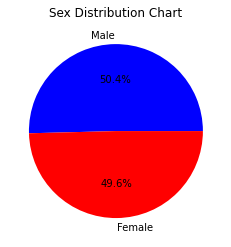

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_dist = [cleaned_mouse_df.loc[cleaned_mouse_df["Sex"]=="Male", "Mouse ID"].nunique()\
            , cleaned_mouse_df.loc[cleaned_mouse_df["Sex"]=="Female", "Mouse ID"].nunique()]
sex = ["Male", "Female"]
colors = ["blue", "red"]

plt.pie(sex_dist, labels=sex, colors=colors, autopct="%1.1f%%")

plt.title("Sex Distribution Chart")


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
target_drugs_df = cleaned_mouse_df.loc[:, ("Mouse ID",
                                           "Drug Regimen",
                                           "Sex",
                                           "Age_months",
                                           "Weight (g)",
                                           "Timepoint",
                                           "Tumor Volume (mm3)",
                                           "Metastatic Sites")]

placebo = target_drugs_df[target_drugs_df["Drug Regimen"] == "Placebo"].index
zoniferol = target_drugs_df[target_drugs_df["Drug Regimen"] == "Zoniferol"].index
propriva = target_drugs_df[target_drugs_df["Drug Regimen"] == "Propriva"].index
stelasyn = target_drugs_df[target_drugs_df["Drug Regimen"] == "Stelasyn"].index
naftisol = target_drugs_df[target_drugs_df["Drug Regimen"] == "Naftisol"].index
ketapril = target_drugs_df[target_drugs_df["Drug Regimen"] == "Ketapril"].index




target_drugs_df.drop(placebo, inplace=True)
target_drugs_df.drop(zoniferol, inplace=True)
target_drugs_df.drop(propriva, inplace=True)
target_drugs_df.drop(stelasyn, inplace=True)
target_drugs_df.drop(naftisol, inplace=True)
target_drugs_df.drop(ketapril, inplace=True)


# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_df = target_drugs_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_tumor_vol_df = pd.merge(greatest_timepoint_df, target_drugs_df, how="left", on=("Mouse ID", "Timepoint"))

last_tumor_vol_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
plotting_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    treatment_volume = last_tumor_vol_df.loc[last_tumor_vol_df["Drug Regimen"] ==treatment, "Tumor Volume (mm3)"]
    plotting_list.append(treatment_volume)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = treatment_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of {treatment} is: {lowerq}")
    print(f"The upper quartile of {treatment} is: {upperq}")
    print(f"The interquartile range of {treatment} is: {iqr}")
    print(f"The the median of {treatment} is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print("")
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.

The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interqu

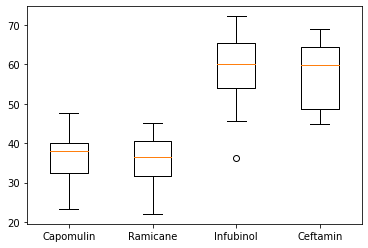

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(plotting_list, labels= treatments)
plt.show()

## Line and Scatter Plots

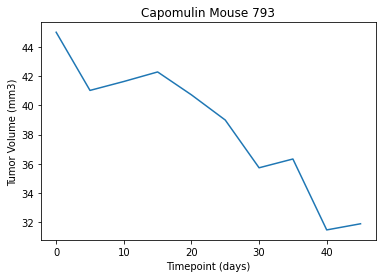

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_mouse = cleaned_mouse_df.loc[cleaned_mouse_df["Drug Regimen"]== "Capomulin"]
capomulin_mouse = capomulin_mouse.loc[capomulin_mouse["Mouse ID"]== "y793"]
plt.plot(capomulin_mouse ["Timepoint"], capomulin_mouse ["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title ("Capomulin Mouse 793")
plt.show()

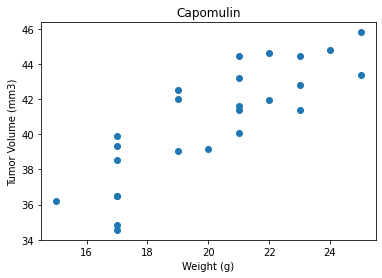

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_mouse = cleaned_mouse_df.loc[cleaned_mouse_df["Drug Regimen"]== "Capomulin"]
mouse_average = capomulin_mouse.groupby ("Mouse ID").mean()
plt.scatter(mouse_average ["Weight (g)"], mouse_average["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin")
plt.show()

## Correlation and Regression

The correlation coefficient between Weight (g) and Tumor Volume is 0.84


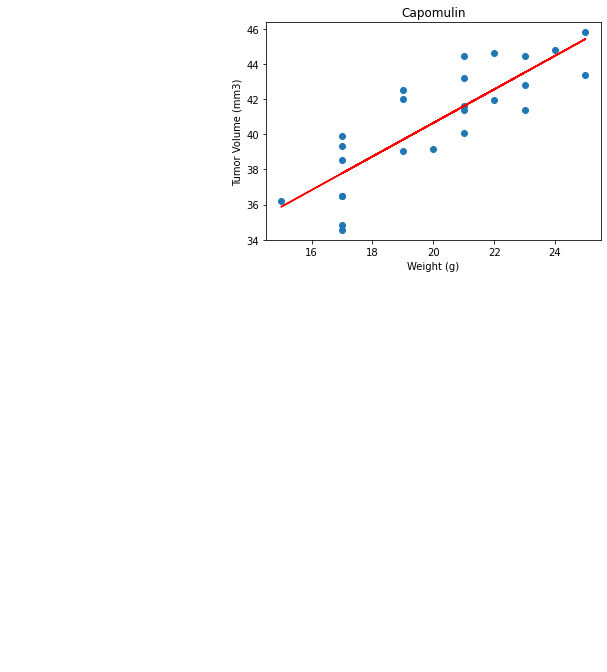

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between Weight (g) and Tumor Volume is {round(st.pearsonr(mouse_average['Weight (g)'], mouse_average ['Tumor Volume (mm3)'])[0],2)}")
x_values = mouse_average['Weight (g)']
y_values = mouse_average['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Capomulin")
plt.show()

# Observation

*